# Analysis and Visualization of Complex Agro-Environmental Data
---
## Exercise 3 + 4
#### Lucas Johannsen 

In [1]:
#hide
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

df = pd.read_csv('../../Examples/EFIplus_medit.zip',compression='zip', sep=";")
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')

In [2]:
filter_col = [col for col in df if col.startswith('Ca')]

In [3]:
df['freq'] = df.groupby('Catchment_name')['Catchment_name'].transform('count')
df_use = df[['freq', 'Catchment_name', 'temp_ann']]

In [4]:
df_use_one_catch = df_use.drop_duplicates(['Catchment_name'],keep='first')

In [5]:
df_use_top = df_use_one_catch.sort_values(['freq'],ascending = False).head()

In [6]:
df_use_highfreq = df_use[df_use['freq'] > 501]

, xlabel= "Mean annual Temp (C°)"

Text(0, 0.5, 'Catchment name')

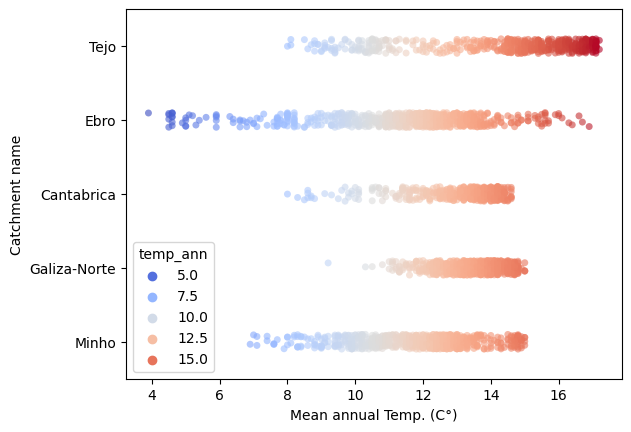

In [7]:
g1 = sns.stripplot(x="temp_ann", y="Catchment_name",data=df_use_highfreq, orient="h",hue='temp_ann', 
                  palette='coolwarm', 
                  jitter=True, edgecolor='none', alpha=.60)
g1.set_xlabel("Mean annual Temp. (C°)")
g1.set_ylabel("Catchment name")

Text(0, 0.5, 'Catchment name')

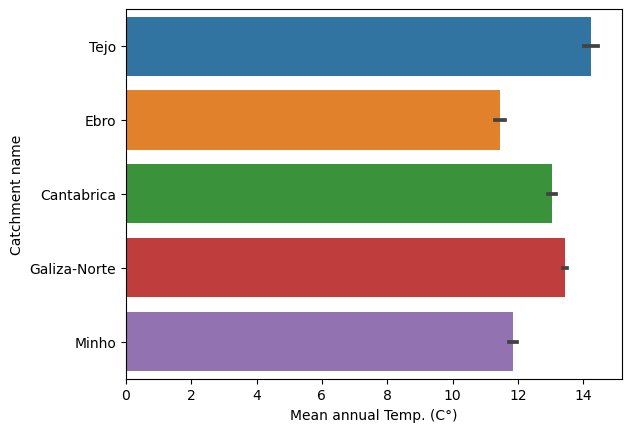

In [8]:
g1 = sns.barplot(x="temp_ann", y="Catchment_name",data=df_use_highfreq, orient="h")
g1.set_xlabel("Mean annual Temp. (C°)")
g1.set_ylabel("Catchment name")

Text(0.5, 0, 'Catchment name')

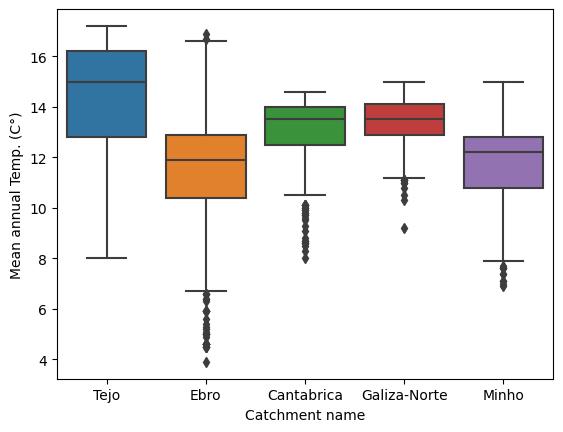

In [9]:
g1 = sns.boxplot(x="Catchment_name",y="temp_ann",data=df_use_highfreq)
g1.set_ylabel("Mean annual Temp. (C°)")
g1.set_xlabel("Catchment name")

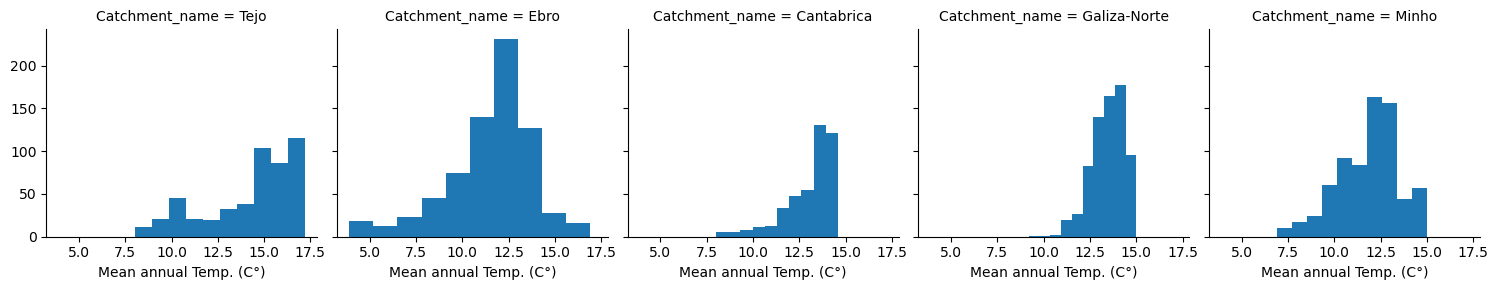

In [10]:
g1 = sns.FacetGrid(data=df_use_highfreq, col="Catchment_name")
g1 = g1.map(plt.hist, "temp_ann")
g1 = g1.set_xlabels("Mean annual Temp. (C°)")


<AxesSubplot: xlabel='temp_ann', ylabel='Count'>

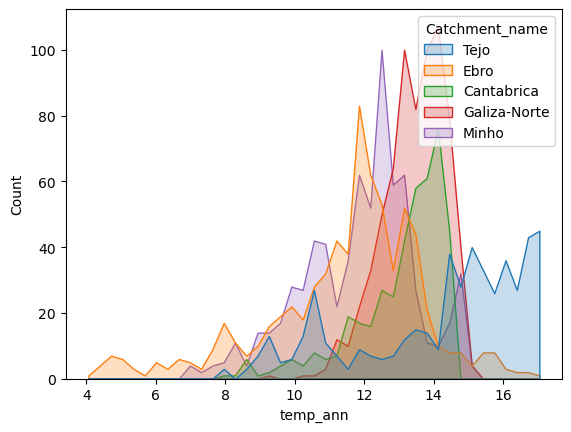

In [11]:
sns.histplot(data=df_use_highfreq, x="temp_ann", hue="Catchment_name",element="poly")

In [12]:
import random

In [13]:
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
df1 = pd.DataFrame(columns=['Value', 'Mean'])
for i in range(1000):
    for i in sample_sizes:
        sample = df_use['temp_ann'].sample(n=i, replace=True).mean()
        df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)


df

C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\597280670.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\597280670.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\597280670.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\597280670.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp,freq
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,63
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,509
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,509
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,509
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,56
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,56
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,56
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,56


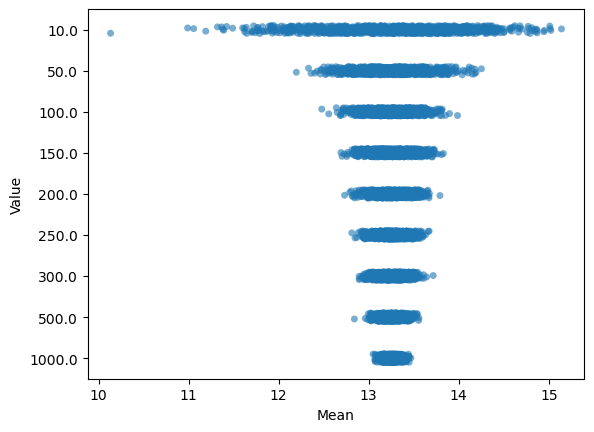

In [14]:
g1 = sns.stripplot(y="Value", x="Mean",data=df1, orient="h", 
                  jitter=True, edgecolor='none', alpha=.60)


In [15]:
filter_col = [col for col in df if col.startswith('Ac')]
filter_col

['Actual_river_slope',
 'Acidification',
 'Achondrostoma arcasii',
 'Achondrostoma occidentale',
 'Achondrostoma oligolepis',
 'Acipenser naccarii']

In [16]:
df_wi = df[df['Salmo trutta fario'] == 1]
df_wi = df_wi[['Salmo trutta fario', 'temp_ann']]

In [17]:
# Define the bins to use
bins = [6, 8, 10, 12, 14, 16, 18]

# Use the cut() function to bin the values column
df_wi['bins'] = pd.cut(df_wi['temp_ann'], bins)
df_wi

,Salmo trutta fario,temp_ann,bins
1,1,9.3,"(8, 10]"
2,1,10.1,"(10, 12]"
3,1,10.1,"(10, 12]"
4,1,10.3,"(10, 12]"
5,1,10.6,"(10, 12]"
...,...,...,...
5006,1,14.9,"(14, 16]"
5007,1,15.0,"(14, 16]"
5008,1,15.0,"(14, 16]"
5009,1,12.9,"(12, 14]"


In [18]:
counts = df_wi.groupby(['bins', 'Salmo trutta fario']).size().reset_index(name='count')
print(counts)

       bins  Salmo trutta fario  count
0    (6, 8]                   1     58
1   (8, 10]                   1    266
2  (10, 12]                   1    728
3  (12, 14]                   1   1351
4  (14, 16]                   1    503
5  (16, 18]                   1      8


<AxesSubplot: xlabel='temp_ann', ylabel='Count'>

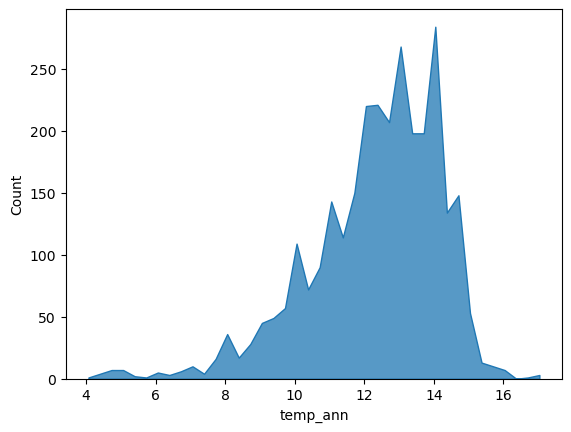

In [19]:
sns.histplot(data=df_wi, x="temp_ann",element="poly")

In [20]:
slope = df['Actual_river_slope'].to_numpy()

In [21]:
slope

array([1.0000e-03, 1.3406e+01, 9.3980e+00, ..., 3.0590e+00, 6.2100e+01,
       1.7800e+01])

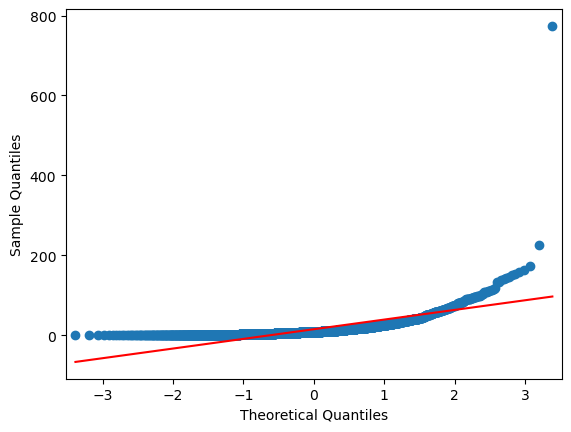

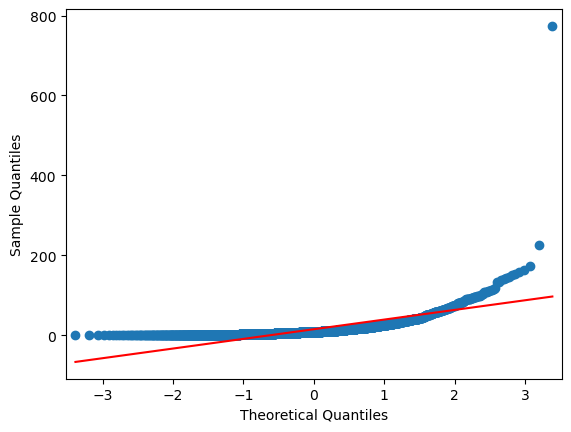

In [22]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
df_nona = df.dropna()
qqplot(df_nona['Actual_river_slope'], line='s')
#pyplot.ylim(-3, 3)

<AxesSubplot: xlabel='Actual_river_slope', ylabel='Count'>

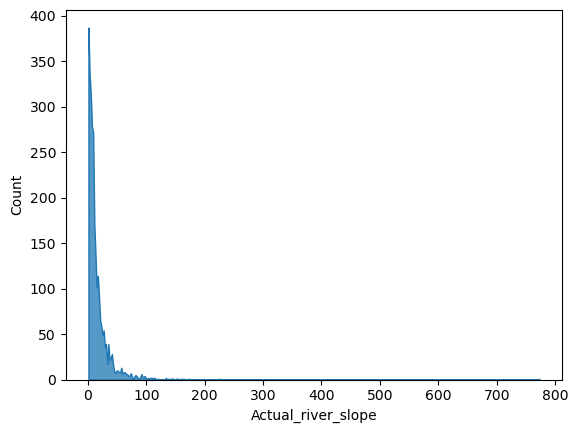

In [23]:
sns.histplot(data=df_nona, x="Actual_river_slope",element="poly")

In [24]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df['Actual_river_slope'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=nan, p=1.000
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


c:\Users\Lucas\miniconda3\envs\pydata-book\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
data= {'data' : randn(2000)}
data = pd.DataFrame(data)
sample_sizes = [15]
df1 = pd.DataFrame(columns=['Value', 'Mean'])
for i in range(100):
    for i in sample_sizes:
        sample = data['data'].sample(n=i, replace=True).mean()
        df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)


df1

C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\2578347075.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\2578347075.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\2578347075.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Value': i, 'Mean': sample}, ignore_index=True)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_2268\2578347075.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Value,Mean
0,15.0,-0.124995
1,15.0,-0.099493
2,15.0,-0.263352
3,15.0,0.026200
4,15.0,-0.267341
...,...,...
95,15.0,-0.201533
96,15.0,0.197405
97,15.0,0.167082
98,15.0,0.361514


<AxesSubplot: xlabel='data', ylabel='Count'>

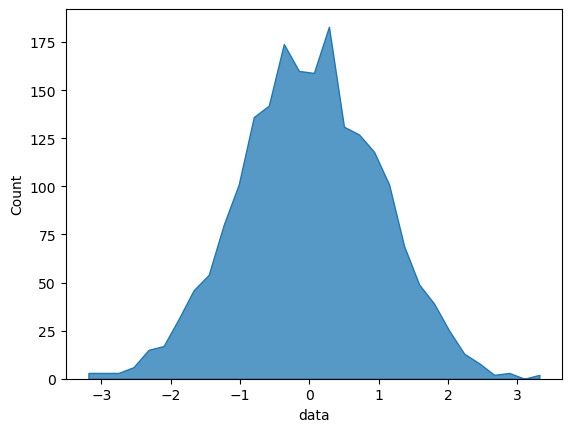

In [26]:
sns.histplot(data=data, x="data",element="poly")

In [27]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data['data'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.999, p=0.832
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)
